In [55]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02/conn/lsn-first'

Enter the path to the dictionary generated by Notebook 01

In [56]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/redo2/conn/tmp/dataset_dict_prune_lsn-first.json'

# 01 - Begin Analysis

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

One or Two-Tail P Values?

- ``` tails = 'one_tail' or tails = 'two_tail' ```

Numer of permutations? 
- Pearson is ~10x faster than Spearman

Would you like to compare maps wiht spearman or pearson?

- ``` method = 'spearman' or method = 'pearson' ```

Would you like to FWE correct the pairwise matrix?

- ``` fwe = True or fwe = False ```

In [67]:
tails = 'one_tail'
n_permutations = 100
method = 'pearson'
fwe = False
datasets_to_flip = []#'Alzheimer Disease', 'Multiple Sclerosis', 'Penetrating TBI']# ['Parietal TMS Hebscher'] #['adni_Alzheimer', 'corbetta_memory', 'manitoba_memory', 'ms_memory']

Run it

In [68]:
from calvin_utils.ccm_utils.ccm_correlation_analysis import CorrelationAnalysis
correlation_analysis = CorrelationAnalysis(data_dict_path=dict_path, 
                                           method=method, 
                                           datasets_to_flip=datasets_to_flip,
                                           n_permutations=n_permutations,
                                           out_dir=out_dir,
                                           topology_command=None)
p_value, pairwise_p_values = correlation_analysis.run(tails, fwe)

Running permutations: 100%|██████████| 100/100 [03:53<00:00,  2.34s/it]

Calculating one-tailed p-values
The observed average similarity is: 0.31417453257070194
The one_tail p-value is: 0.09. This is the proportion of permuted averages that are greater than the observed average.
Overall p-value: 0.09


# 02 - Visualize Results

Similarity matrix (Signs Included)

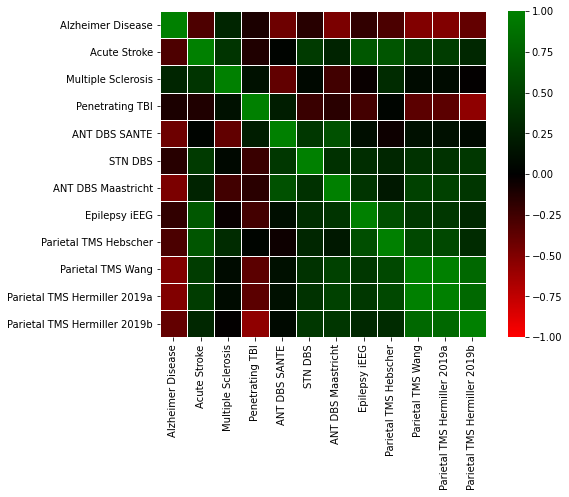

In [ ]:
limit = correlation_analysis.matrix_heatmap(correlation_analysis.original_similarity_matrix, type='misc', output_path=out_dir, colorscale='viridis')

In [69]:
correlation_analysis.original_similarity_matrix

array([[ 1.        , -0.29995247,  0.28453386, -0.10487997, -0.42411995,
        -0.15156892, -0.48289355, -0.18997445, -0.29340468, -0.50534176,
        -0.50534176, -0.38965843],
       [-0.29995247,  1.        ,  0.40122039, -0.12082348,  0.02430519,
         0.45191045,  0.27288256,  0.67357425,  0.66022101,  0.46770704,
         0.46770704,  0.30371365],
       [ 0.28453386,  0.40122039,  1.        ,  0.13013554, -0.38151897,
         0.05888877, -0.2559223 , -0.03360661,  0.33337372,  0.08545111,
         0.08545111, -0.01455621],
       [-0.10487997, -0.12082348,  0.13013554,  1.        ,  0.22350064,
        -0.22575958, -0.16174526, -0.25789969,  0.03503071, -0.35756986,
        -0.35756986, -0.55533975],
       [-0.42411995,  0.02430519, -0.38151897,  0.22350064,  1.        ,
         0.42577917,  0.62773171,  0.1047389 , -0.05007962,  0.12180496,
         0.12180496,  0.06916435],
       [-0.15156892,  0.45191045,  0.05888877, -0.22575958,  0.42577917,
         1.        ,  

View the Overall Similarities of the Topology, Signs Aside

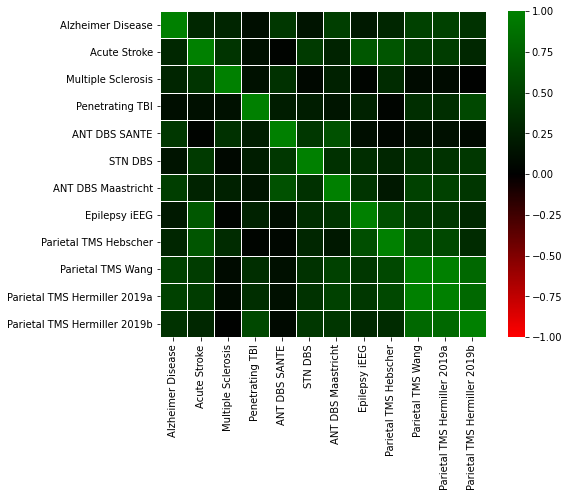

In [ ]:
import numpy as np
limit = correlation_analysis.matrix_heatmap(np.abs(correlation_analysis.original_similarity_matrix), type='misc', output_path=out_dir+'/heatmap_similarity_absval.svg', colorscale='viridis')

Permuted Similarity

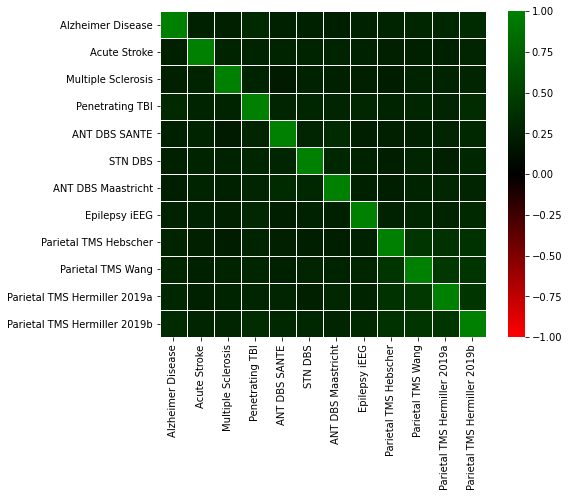

In [ ]:
import numpy as np
avg_sim_mx = np.mean(np.abs(correlation_analysis.permuted_similarity_tensor), axis=0)
l = correlation_analysis.matrix_heatmap(avg_sim_mx, type='misc', output_path=out_dir+'/heatmap_similarity_permuted.svg', limit=limit, colorscale='viridis')

Pairwise P values Matrix

In [73]:
out_dir

'/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02/conn/lsn-first'

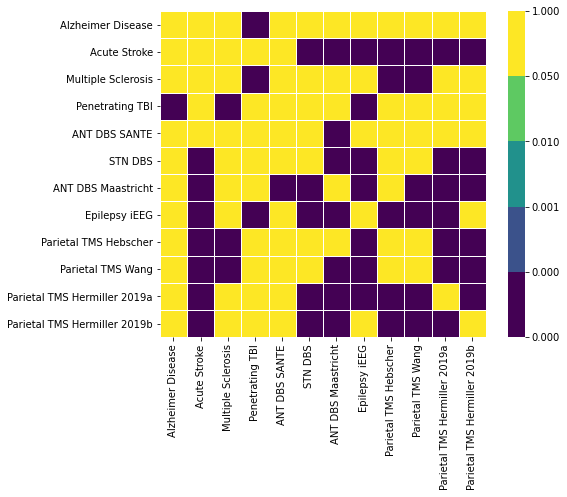

In [ ]:
correlation_analysis.matrix_heatmap(pairwise_p_values, type='pvals', output_path=out_dir)

In [ ]:
pairwise_p_values

# 03 - Run Specific Comparisons

You will have to generate and pass a contrast matrix to see if the comparison of interest exceeds the null distribution

In [ ]:
correlation_analysis.example_identity_contrast(correlation_analysis.original_similarity_matrix)

In [ ]:
contrast_matrix = []

Run the comparisons of interest

In [ ]:
stat, p = correlation_analysis.contrast_outer_summation(correlation_analysis.original_similarity_matrix, correlation_analysis.permuted_similarity_tensor, contrast_matrix)